Performing EDA on all unaltered datasets & clustering on finalize data set.

# Table of Content
- Imports
- Load Data
- kaggle_fakenews_df
- kaggle_huff_df
- kaggle_new_york_times_df
- buzzfeed_fakenews_df

# Imports

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from IPython.display import display, Markdown, Latex
from zipfile import ZipFile 
import pickle

# Load Data

In [18]:
_  = os.path.join('data', 'kaggle_fake_news_train.csv')
kaggle_fakenews_df = pd.read_csv(_)

In [33]:
# OS safe file path
_  = os.path.join('data', 'kaggle_huff_news_category_v2.json')

# Get json data as dictionary
_ = [json.loads(line) for line in open(_, 'r')]

#create dataframe with list of dictionaries
kaggle_huff_df = pd.DataFrame(_)

In [3]:
_ = os.path.join('data', 'nytimes_news_articles.txt')
with open(_, 'r', encoding="utf-8") as file:
    
    articles = []
    urls = []
    index = -1
    lines =  file.readlines()  
    
    for line in lines:    
        if line.find('URL:') != -1:
            index += 1
            urls.append(line.split()[1])
            articles.append('')
        elif line != '':
            articles[index] = articles[index] + line  + ' '
        else:
            pass

kaggle_new_york_times_df = pd.DataFrame({'total': articles})

In [20]:
_  = os.path.join('data', 'buzzfeed_2018_fake_news.csv')
buzzfeed_fakenews_df = pd.read_csv(_)

In [ ]:
_  = os.path.join('potential_data', 'prep_final_df.pkl')
with open(_, 'rb') as file:
    final_df = pickle.load(file) 

# kaggle_fakenews_df

In [27]:
display(kaggle_fakenews_df.head())
print('Unique ids and shape', (kaggle_fakenews_df.id.nunique(), kaggle_fakenews_df.shape[0]))

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Unique ids and shape (20800, 20800)


The id columns seems to be the same as the index.
    
**Actions to be taken**
- Removing the id columns entirely

In [28]:
kaggle_fakenews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


The text is the most defining feature, Any observation without it is not technically an article. Even without an author or title the text is still very important and will be preserved.

**Actions to be taken**
- All rows with nan text will be classified as fake
- All text and title with nan will be filled with empty strings

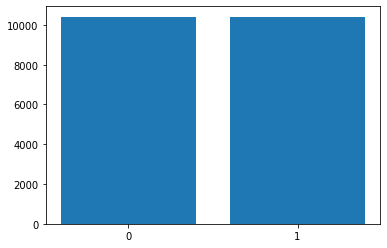

In [29]:
x = kaggle_fakenews_df.label.value_counts().index
y = kaggle_fakenews_df.label.value_counts()
plt.bar(x=x, tick_label=x, height=y);

The target's distubtion of data is uniform. No actions required

Max number of articles written: 243
Min number of articles written: 1
Average number of articles written: 4.485360628421804
Median number of articles written: 1.0


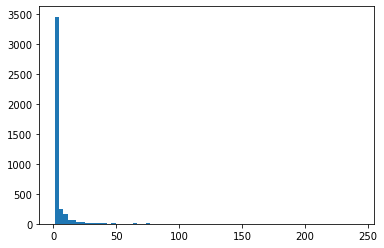

In [30]:
print('Max number of articles written:', kaggle_fakenews_df.author.value_counts().max())
print('Min number of articles written:', kaggle_fakenews_df.author.value_counts().min())
print('Average number of articles written:', kaggle_fakenews_df.author.value_counts().mean())
print('Median number of articles written:', kaggle_fakenews_df.author.value_counts().median())
plt.hist(kaggle_fakenews_df.author.value_counts(), bins=70);

the average number of articles written by an author is ~ 4.5. There is an outlier that wrote over 243 articles but this is sto;; less than 1% of the data. No actions required

Average number of words in factual articles: 878.9965341292
Median number of words in factual articles: 773.0

Average number of words in factual articles: 639.06847210218
Median number of words in factual articles: 382.0


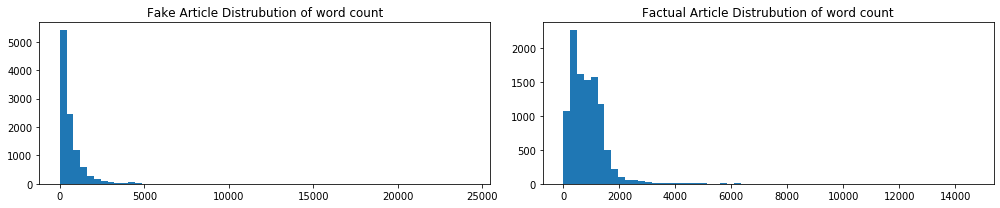

In [31]:
factual = kaggle_fakenews_df[kaggle_fakenews_df['label'] == 0]['text'].map(lambda word: len(word.split()))
fake = kaggle_fakenews_df[kaggle_fakenews_df['label'] == 1]['text'].map(lambda word: len(word.split()) 
                                                            if isinstance(word, str) == True
                                                            else 0
                                                           )

print('Average number of words in factual articles:', factual.mean())
print('Median number of words in factual articles:', factual.median())
print()
print('Average number of words in factual articles:', fake.mean())
print('Median number of words in factual articles:', fake.median())

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 3))

ax[0].hist(fake, bins=60)
ax[0].set_title('Fake Article Distrubution of word count')
ax[1].hist(factual, bins=60)
ax[1].set_title('Factual Article Distrubution of word count')

plt.tight_layout();

- The number of words in a fake article aren't normally distrubted and are on average 200 words less except for outliers.
- Factual articles distubtion is skewed to the left. I assume this is due to wanting to be a shorter read for users.

### <span style ="color:blue"> All Actions to be Taken 

<span style ="color:blue">
   
- Removing the id columns entirely
- All rows with nan text will be classified as fake
- All text and title with nan will be filled with empty strings

</span>

# kaggle_huff_df

In [34]:
kaggle_huff_df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [36]:
kaggle_huff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
authors              200853 non-null object
category             200853 non-null object
date                 200853 non-null object
headline             200853 non-null object
link                 200853 non-null object
short_description    200853 non-null object
dtypes: object(6)
memory usage: 9.2+ MB


A link to each article is provided. Tne data is clean with no nan values but no classification for fake or realible. Huffinton is considered a reliable source in a my sourced media bias chart.

**Actions to be taken** 
- all observations will be classified as reliable = 0.

# kaggle_new_york_times_df

In [4]:
kaggle_new_york_times_df.head()

,total
0,\n WASHINGTON — Stellar pitching kept the Mets...
1,\n Mayor Bill de Blasio’s counsel and chief le...
2,\n In the early morning hours of Labor Day las...
3,\n It was the Apple Store in New York City bef...
4,\n OMAHA — The United States Olympic swimming ...


In [5]:
kaggle_new_york_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 1 columns):
total    8888 non-null object
dtypes: object(1)
memory usage: 69.5+ KB


In [10]:
print(kaggle_new_york_times_df.iloc[0, 0])


 WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.
 “We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”
 Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.
 “We’re not even giving ourselves chances,” Collins said, adding later, “We just can’t give our pitchers any room to work.”
 The Mets did not score until the ninth inning, when a last-gasp two-run homer by James Loney off Nat

815.0829207920792


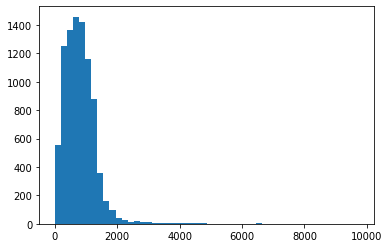

In [15]:
_ = kaggle_new_york_times_df['total'].map(lambda x: len(x.split()))
print(_.mean())
plt.hist(x=_, bins=50);

- The average number of word per article is ~ 815. this is very close to the ~ 878.996 words per reliable article for the intial dataset kaggle_fakenews_df. 

**Actions to be taken**
- all observations will be classified as reliable = 0.

# buzzfeed_fakenews_df

In [55]:
buzzfeed_fakenews_df.head()

,title,url,fb_engagement,published_date,category,source
0,"Lottery winner arrested for dumping $200,000 o...",https://worldnewsdailyreport.com/lottery-winne...,"2,383,021.00",2018-05-13,Crime,NaN
1,Former first lady Barbara Bush dies at 92 - CNN,http://breaking-cnn.com/former-first-lady-barb...,"2,290,000.00",2018-04-16,Politics,Trendolizer
2,Woman sues Samsung for $1.8M after cell phone ...,https://worldnewsdailyreport.com/woman-sues-sa...,"1,304,430.00",2018-09-19,Medical,NaN
3,BREAKING: Michael Jordan Resigns From The Boar...,https://trumpbetrayed.us/all/breaking-michael-...,"911,336.00",2018-09-05,Business,NaN
4,Donald Trump Ends School Shootings By Banning ...,https://www.8shit.net/donald-trump-ends-school...,"830,116.00",2018-02-23,Politics,NaN


In [39]:
buzzfeed_fakenews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13961 entries, 0 to 13960
Data columns (total 6 columns):
title             13960 non-null object
url               13961 non-null object
fb_engagement     13961 non-null object
published_date    13961 non-null object
category          11854 non-null object
source            9 non-null object
dtypes: object(6)
memory usage: 654.5+ KB


- The Sources columns seem to be mostly null. url column is all I need to get the article
- This dataset doesn't provide an article in text format. 

**Actions to be taken**
- Remove the source column
- I'll be scraping the urls and adding it's content to a new column called "total"
- Nan sources will be replaced with "unknowns" to perserve the data and deal with this edge case.

20 out of 165


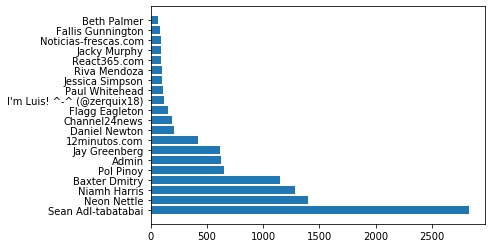

In [52]:
y = buzzfeed_fakenews_df.category.value_counts()[:20]
x = y.index
size = buzzfeed_fakenews_df.category.value_counts().shape[0]
print(y.shape[0], 'out of', size)
plt.barh(width=y, y=x);

- There are over 165 different topics. Some topics appears to be the names of famous people. 

**Actions to be taken**
- Topics will be concatonated with the articles. Topics aren't general enough  but they may be able to explain how relaible articles are classified.

### <span style ="color:blue"> All Actions to be Taken </span>

<span style ="color:blue">
    
- Remove the source column
- I'll be scraping the urls and adding it's content to a new column to be merge with the kaggle dataset
- Nan sources will be replaced with unknowns t perserve urls
Topics will be concatonated with the articles. Topics aren't general enough but they may be able to explain how relaible articles are classified.

</span>